# 1. Regression

## Compare the performance of 8 Regressers across 8 Regression datasets.

In [1]:
datasets_name = ['wine', 'communities', 'qsar', 'facebook', 'bike', 'student', 'concrete', 'sgemm']
models = ['Linear', 'SVM', 'DecisionTree', 'RandomForest', 'KNN', 'AdaBoost', 'GaussianProcess', 'NeuralNetwork']
models_performances = {model:{dataset_name:0 for dataset_name in datasets_name} for model in models}

### Import Required Libraries

In [2]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model, metrics
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import sklearn.gaussian_process as gp
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer


## Dataset 1: Wine Quality

### Data analysis and visualization

In [3]:
#importing data
wine_df=pd.read_csv('datasets/winequality-red.csv', sep=';', dtype=float)
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5.0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5.0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6.0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5.0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6.0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5.0


In [4]:
wine_df['volatile acidity']

0       0.700
1       0.880
2       0.760
3       0.280
4       0.700
        ...  
1594    0.600
1595    0.550
1596    0.510
1597    0.645
1598    0.310
Name: volatile acidity, Length: 1599, dtype: float64

### Data Splitting into Training and Testing

In [5]:
X=wine_df.drop('quality', axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [6]:
Y=wine_df['quality']
Y

0       5.0
1       5.0
2       5.0
3       6.0
4       5.0
       ... 
1594    5.0
1595    6.0
1596    6.0
1597    5.0
1598    6.0
Name: quality, Length: 1599, dtype: float64

In [7]:
Y.iloc[1]+Y.iloc[1]

10.0

In [8]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8


# In the first step we will split the data in training and remaining dataset
x_train, x_test, y_train, y_test = train_test_split(X,Y, train_size=0.8, random_state=0)


### Training Phase

#### 1. Linear regression

In [9]:
# create linear regression object
l_reg_wine = linear_model.LinearRegression()
 
# train the model using the training sets
l_reg_wine.fit(x_train, y_train)


LinearRegression()

#### 2. Support vector regression

In [10]:
svr_rbf_wine = SVR(kernel="rbf", C=100,max_iter=10000, gamma=0.1, epsilon=0.1)
svr_rbf_wine.fit(x_train, y_train)


C:\Users\Sam\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVR(C=100, gamma=0.1, max_iter=10000)

#### 3. Decision tree regression

In [11]:
dr_regr_wine = DecisionTreeRegressor(max_depth=100, random_state=0)
dr_regr_wine.fit(x_train, y_train)


DecisionTreeRegressor(max_depth=100, random_state=0)

#### 4. Random forest regression

In [12]:
r_f_wine= RandomForestRegressor(random_state=0)
r_f_wine.fit(x_train, y_train)


RandomForestRegressor(random_state=0)

#### 5. k-nearest neighbours regression

In [13]:
kn_wine = KNeighborsRegressor(n_neighbors=8)
# n_neighbors=8

kn_wine.fit(x_train,y_train)
# print('Variance score: {}'.format(kn.score(x_test, y_test)))

KNeighborsRegressor(n_neighbors=8)

#### 6. AdaBoost regression

In [14]:
ada_wine = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_wine.fit(x_train,y_train)


AdaBoostRegressor(n_estimators=100, random_state=0)

#### 7. Gaussian process regression

In [15]:
gpr_wine = gp.GaussianProcessRegressor(n_restarts_optimizer=10, alpha=0.1, normalize_y=True, random_state=0)
gpr_wine.fit(x_train, y_train)


GaussianProcessRegressor(alpha=0.1, n_restarts_optimizer=10, normalize_y=True,
                         random_state=0)

#### 8. Neural network regression

In [16]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = x_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()
NN_model.fit(x_train, y_train, epochs=20, batch_size=32, validation_split = 0.2)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               1536      
                                                                 
 dense_1 (Dense)             (None, 256)               33024     
                                                                 
 dense_2 (Dense)             (None, 256)               65792     
                                                                 
 dense_3 (Dense)             (None, 256)               65792     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 166,401
Trainable params: 166,401
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
32/32 [==============================] 

### Testing Phase

#### 1. Linear regression

In [17]:
output = l_reg_wine.predict(x_test)
models_performances["Linear"]["wine"] = r2_score(y_test, output)
print('MSE: {}'.format(mean_squared_error(y_test, output)))
print(f'R2: {r2_score(y_test, output)}')

MSE: 0.3844711978201255
R2: 0.3283887639580202


#### 2. Support vector regression

In [18]:
output = svr_rbf_wine.predict(x_test)
models_performances["SVM"]["wine"] = r2_score(y_test, output)
print('MSE: {}'.format(mean_squared_error(y_test, output)))
print(f'R2: {r2_score(y_test, output)}')

MSE: 0.698181023075342
R2: -0.21961338728957736


#### 3. Decision tree regression

In [19]:
output = dr_regr_wine.predict(x_test)
models_performances["DecisionTree"]["wine"] = r2_score(y_test, output)
print('MSE: {}'.format(mean_squared_error(y_test, output)))
print(f'R2: {r2_score(y_test, output)}')

MSE: 0.621875
R2: -0.08631866257250076


#### 4. Random forest regression

In [20]:
output = r_f_wine.predict(x_test)
models_performances["RandomForest"]["wine"] = r2_score(y_test, output)
print('MSE: {}'.format(mean_squared_error(y_test, output)))
print(f'R2: {r2_score(y_test, output)}')

MSE: 0.3242909375
R2: 0.4335142954622996


#### 5. k-nearest neighbours regression

In [21]:
output = kn_wine.predict(x_test)
models_performances["KNN"]["wine"] = r2_score(y_test, output)
print('MSE: {}'.format(mean_squared_error(y_test, output)))
print(f'R2: {r2_score(y_test, output)}')

MSE: 0.493798828125
R2: 0.137410440122825


#### 6. AdaBoost regression

In [22]:
output = ada_wine.predict(x_test)
models_performances["AdaBoost"]["wine"] = r2_score(y_test, output)
print('MSE: {}'.format(mean_squared_error(y_test, output)))
print(f'R2: {r2_score(y_test, output)}')

MSE: 0.40642325152249426
R2: 0.2900419488928112


#### 7. Gaussian process regression

In [23]:
output = gpr_wine.predict(x_test)
models_performances["GaussianProcess"]["wine"] = r2_score(y_test, output)
print('MSE: {}'.format(mean_squared_error(y_test, output)))
print(f'R2: {r2_score(y_test, output)}')

MSE: 0.4472905501833061
R2: 0.21865315014038644


#### 8. Neural network regression

In [24]:
output = NN_model.predict(x_test)
models_performances["NeuralNetwork"]["wine"] = r2_score(y_test, output)
print('MSE: {}'.format(mean_squared_error(y_test, output)))
print(f'R2: {r2_score(y_test, output)}')

MSE: 0.41675939806891693
R2: 0.27198631248282


## Dataset 2: Communities and Crime

### Import Required Libraries

In [25]:
names = list()
with open("datasets/communities.names","r") as f:
    for l in f.readlines():
        l = l.split(" ")
        if l[0] == "@attribute":
            names.append(l[1])
comm_dataset = pd.read_csv("datasets/communities.data", delimiter=',', names=names)

# feature selection
L_drop = [comm_dataset.columns[0], comm_dataset.columns[1], comm_dataset.columns[2], comm_dataset.columns[3]]
for i in range(11,len(comm_dataset.columns)):
    L_drop.append(comm_dataset.columns[i])
comm_df = comm_dataset.drop(columns=L_drop)

comm_df['y'] = comm_dataset['state']
comm_df = comm_df.astype(float)

### Data analysis and visualization

In [26]:
comm_df.head()

,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,y
0,1.0,0.19,0.33,0.02,0.90,0.12,0.17,8.0
1,1.0,0.00,0.16,0.12,0.74,0.45,0.07,53.0
2,1.0,0.00,0.42,0.49,0.56,0.17,0.04,24.0
3,1.0,0.04,0.77,1.00,0.08,0.12,0.10,34.0
4,1.0,0.01,0.55,0.02,0.95,0.09,0.05,42.0


### Data Splitting into Training and Testing

In [27]:
X0=comm_df.drop('y', axis=1)
Y0=comm_df['y']

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8


# In the first step we will split the data in training and remaining dataset
x_train0, x_test0, y_train0, y_test0 = train_test_split(X0,Y0, train_size=0.8, random_state=0)


### Training Phase

#### 1. Linear regression

In [28]:
# create linear regression object
l_reg_comm_df = linear_model.LinearRegression()
 
# train the model using the training sets
l_reg_comm_df.fit(x_train0, y_train0)

LinearRegression()

#### 2. Support vector regression

In [29]:
svr_rbf_comm_df  = SVR(kernel="rbf", C=100,max_iter=10000, gamma=0.1, epsilon=0.1)
svr_rbf_comm_df.fit(x_train0, y_train0)

SVR(C=100, gamma=0.1, max_iter=10000)

#### 3. Decision tree regression

In [30]:
dr_regr_comm_df  = DecisionTreeRegressor(max_depth=100, random_state=0)
dr_regr_comm_df.fit(x_train0, y_train0)

DecisionTreeRegressor(max_depth=100, random_state=0)

#### 4. Random forest regression

In [31]:
r_f_comm_df= RandomForestRegressor(random_state=0)
r_f_comm_df.fit(x_train0, y_train0)

RandomForestRegressor(random_state=0)

#### 5. k-nearest neighbours regression

In [32]:
kn_comm_df = KNeighborsRegressor(n_neighbors=8)
kn_comm_df.fit(x_train0,y_train0)

KNeighborsRegressor(n_neighbors=8)

#### 6. AdaBoost regression

In [33]:
ada_comm_df  = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_comm_df .fit(x_train0,y_train0)

AdaBoostRegressor(n_estimators=100, random_state=0)

#### 7. Gaussian process regression

In [34]:
gpr_comm_df  = gp.GaussianProcessRegressor(n_restarts_optimizer=10, alpha=0.1, normalize_y=True, random_state=0)
gpr_comm_df.fit(x_train0, y_train0)

GaussianProcessRegressor(alpha=0.1, n_restarts_optimizer=10, normalize_y=True,
                         random_state=0)

#### 8. Neural network regression

In [35]:
NN_model0 = Sequential()

# The Input Layer :
NN_model0.add(Dense(128, kernel_initializer='normal',input_dim = x_train0.shape[1], activation='relu'))

# The Hidden Layers :
NN_model0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model0.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model0.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model0.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model0.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model0.summary()
NN_model0.fit(x_train0, y_train0, epochs=20, batch_size=32, validation_split = 0.2)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 128)               1024      
                                                                 
 dense_6 (Dense)             (None, 256)               33024     
                                                                 
 dense_7 (Dense)             (None, 256)               65792     
                                                                 
 dense_8 (Dense)             (None, 256)               65792     
                                                                 
 dense_9 (Dense)             (None, 1)                 257       
                                                                 
Total params: 165,889
Trainable params: 165,889
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
40/40 [==============================

### Testing Phase

#### 1. Linear regression

In [36]:
output = l_reg_comm_df.predict(x_test0)
models_performances["Linear"]["communities"] = r2_score(y_test0, output)
print('MSE: {}'.format(mean_squared_error(y_test0, output)))
print(f'R2: {r2_score(y_test0, output)}')

MSE: 235.9396685440531
R2: 0.15036327727266985


#### 2. Support vector regression

In [37]:
output = svr_rbf_comm_df.predict(x_test0)
models_performances["SVM"]["communities"] = r2_score(y_test0, output)
print('MSE: {}'.format(mean_squared_error(y_test0, output)))
print(f'R2: {r2_score(y_test0, output)}')

MSE: 255.00016321802306
R2: 0.08172498372802217


#### 3. Decision tree regression

In [38]:
output = dr_regr_comm_df.predict(x_test0)
models_performances["DecisionTree"]["communities"] = r2_score(y_test0, output)
print('MSE: {}'.format(mean_squared_error(y_test0, output)))
print(f'R2: {r2_score(y_test0, output)}')

MSE: 418.4636591478697
R2: -0.5069195194384963


#### 4. Random forest regression

In [39]:
output = r_f_comm_df.predict(x_test0)
models_performances["RandomForest"]["communities"] = r2_score(y_test0, output)
print('MSE: {}'.format(mean_squared_error(y_test0, output)))
print(f'R2: {r2_score(y_test0, output)}')

MSE: 211.2767989974937
R2: 0.23917614957980327


#### 5. k-nearest neighbours regression

In [40]:
output = kn_comm_df.predict(x_test0)
models_performances["KNN"]["communities"] = r2_score(y_test0, output)
print('MSE: {}'.format(mean_squared_error(y_test0, output)))
print(f'R2: {r2_score(y_test0, output)}')

MSE: 266.4591557017544
R2: 0.040460278730707344


#### 6. AdaBoost regression

In [41]:
output = ada_comm_df.predict(x_test0)
models_performances["AdaBoost"]["communities"] = r2_score(y_test0, output)
print('MSE: {}'.format(mean_squared_error(y_test0, output)))
print(f'R2: {r2_score(y_test0, output)}')

MSE: 235.91998829925294
R2: 0.1504341473336377


#### 7. Gaussian process regression

In [42]:
output = gpr_comm_df.predict(x_test0)
models_performances["GaussianProcess"]["communities"] = r2_score(y_test0, output)
print('MSE: {}'.format(mean_squared_error(y_test0, output)))
print(f'R2: {r2_score(y_test0, output)}')

MSE: 230.3510320819913
R2: 0.17048838297211288


#### 8. Neural network regression

In [43]:
output = NN_model0.predict(x_test0)
models_performances["NeuralNetwork"]["communities"] = r2_score(y_test0, output)
print('MSE: {}'.format(mean_squared_error(y_test0, output)))
print(f'R2: {r2_score(y_test0, output)}')

MSE: 244.6513435512096
R2: 0.11899187182728133


## Dataset 3: QSAR aquatic toxicity

### Data analysis and visualization

In [44]:
#immporting data
toxic_df=pd.read_csv('datasets/qsar_aquatic_toxicity.csv',  sep=';', 
                     names=["TPSA","SAacc", "H-050", "MLOGP", "RDCHI", "GATS1p", "nN", "C-040", "LC50"],
                    dtype=float)
toxic_df

,TPSA,SAacc,H-050,MLOGP,RDCHI,GATS1p,nN,C-040,LC50
0,0.00,0.000,0.0,2.419,1.225,0.667,0.0,0.0,3.740
1,0.00,0.000,0.0,2.638,1.401,0.632,0.0,0.0,4.330
2,9.23,11.000,0.0,5.799,2.930,0.486,0.0,0.0,7.019
3,9.23,11.000,0.0,5.453,2.887,0.495,0.0,0.0,6.723
4,9.23,11.000,0.0,4.068,2.758,0.695,0.0,0.0,5.979
...,...,...,...,...,...,...,...,...,...
541,24.06,35.776,2.0,3.326,2.837,0.849,2.0,0.0,4.651
542,9.23,11.000,0.0,3.275,2.727,0.874,0.0,0.0,3.953
543,0.00,0.000,0.0,5.165,3.111,0.732,0.0,0.0,6.219
544,13.14,9.507,0.0,2.859,2.614,0.827,0.0,0.0,4.995


### Data Splitting into Training and Testing

In [45]:
X1=toxic_df.drop('LC50', axis=1)
Y1=toxic_df['LC50']

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8


# In the first step we will split the data in training and remaining dataset
x_train1, x_test1, y_train1, y_test1 = train_test_split(X1,Y1, train_size=0.8, random_state=0)


### Training Phase

#### 1. Linear regression

In [46]:
# create linear regression object
l_reg_toxic = linear_model.LinearRegression()
 
# train the model using the training sets
l_reg_toxic.fit(x_train1, y_train1)

LinearRegression()

#### 2. Support vector regression

In [47]:
svr_rbf_toxic  = SVR(kernel="rbf", C=100,max_iter=10000, gamma=0.1, epsilon=0.1)
svr_rbf_toxic.fit(x_train1, y_train1)

SVR(C=100, gamma=0.1, max_iter=10000)

#### 3. Decision tree regression

In [48]:
dr_regr_toxic  = DecisionTreeRegressor(max_depth=100, random_state=0)
dr_regr_toxic.fit(x_train1, y_train1)

DecisionTreeRegressor(max_depth=100, random_state=0)

#### 4. Random forest regression

In [49]:
r_f_toxic= RandomForestRegressor(random_state=0)
r_f_toxic.fit(x_train1, y_train1)

RandomForestRegressor(random_state=0)

#### 5. k-nearest neighbours regression

In [50]:
kn_toxic = KNeighborsRegressor(n_neighbors=8)
kn_toxic.fit(x_train1,y_train1)

KNeighborsRegressor(n_neighbors=8)

#### 6. AdaBoost regression

In [51]:
ada_toxic  = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_toxic .fit(x_train1,y_train1)

AdaBoostRegressor(n_estimators=100, random_state=0)

#### 7. Gaussian process regression

In [52]:
gpr_toxic  = gp.GaussianProcessRegressor(n_restarts_optimizer=10, alpha=0.1, normalize_y=True, random_state=0)
gpr_toxic.fit(x_train1, y_train1)

GaussianProcessRegressor(alpha=0.1, n_restarts_optimizer=10, normalize_y=True,
                         random_state=0)

#### 8. Neural network regression

In [53]:
NN_model1 = Sequential()

# The Input Layer :
NN_model1.add(Dense(128, kernel_initializer='normal',input_dim = x_train1.shape[1], activation='relu'))

# The Hidden Layers :
NN_model1.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model1.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model1.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model1.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model1.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model1.summary()
NN_model1.fit(x_train1, y_train1, epochs=20, batch_size=32, validation_split = 0.2)


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 128)               1152      
                                                                 
 dense_11 (Dense)            (None, 256)               33024     
                                                                 
 dense_12 (Dense)            (None, 256)               65792     
                                                                 
 dense_13 (Dense)            (None, 256)               65792     
                                                                 
 dense_14 (Dense)            (None, 1)                 257       
                                                                 
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
11/11 [==============================

### Testing Phase

#### 1. Linear regression

In [54]:
output = l_reg_toxic.predict(x_test1)
models_performances["Linear"]["qsar"] = r2_score(y_test1, output)
print('MSE: {}'.format(mean_squared_error(y_test1, output)))
print(f'R2: {r2_score(y_test1, output)}')

MSE: 1.4197727187578568
R2: 0.44023740559019386


#### 2. Support vector regression

In [55]:
output = svr_rbf_toxic.predict(x_test1)
models_performances["SVM"]["qsar"] = r2_score(y_test1, output)
print('MSE: {}'.format(mean_squared_error(y_test1, output)))
print(f'R2: {r2_score(y_test1, output)}')

MSE: 1.966374386707823
R2: 0.22473307611689097


#### 3. Decision tree regression

In [56]:
output = dr_regr_toxic.predict(x_test1)
models_performances["DecisionTree"]["qsar"] = r2_score(y_test1, output)
print('MSE: {}'.format(mean_squared_error(y_test1, output)))
print(f'R2: {r2_score(y_test1, output)}')

MSE: 2.4739484641414147
R2: 0.024615847009991754


#### 4. Random forest regression

In [57]:
output = r_f_toxic.predict(x_test1)
models_performances["RandomForest"]["qsar"] = r2_score(y_test1, output)
print('MSE: {}'.format(mean_squared_error(y_test1, output)))
print(f'R2: {r2_score(y_test1, output)}')

MSE: 1.595474133895092
R2: 0.37096499411243333


#### 5. k-nearest neighbours regression

In [58]:
output = kn_toxic.predict(x_test1)
models_performances["KNN"]["qsar"] = r2_score(y_test1, output)
print('MSE: {}'.format(mean_squared_error(y_test1, output)))
print(f'R2: {r2_score(y_test1, output)}')

MSE: 1.9766162769886362
R2: 0.2206950867968367


#### 6. AdaBoost regression

In [59]:
output = ada_toxic.predict(x_test1)
models_performances["AdaBoost"]["qsar"] = r2_score(y_test1, output)
print('MSE: {}'.format(mean_squared_error(y_test1, output)))
print(f'R2: {r2_score(y_test1, output)}')

MSE: 1.6538334205235925
R2: 0.34795613835722816


#### 7. Gaussian process regression

In [60]:
output = gpr_toxic.predict(x_test1)
models_performances["GaussianProcess"]["qsar"] = r2_score(y_test1, output)
print('MSE: {}'.format(mean_squared_error(y_test1, output)))
print(f'R2: {r2_score(y_test1, output)}')

MSE: 1.6485561270616855
R2: 0.35003677523711096


#### 8. Neural network regression

In [61]:
output = NN_model1.predict(x_test1)
models_performances["NeuralNetwork"]["qsar"] = r2_score(y_test1, output)
print('MSE: {}'.format(mean_squared_error(y_test1, output)))
print(f'R2: {r2_score(y_test1, output)}')

MSE: 1.4391318881585005
R2: 0.43260481852456556


## Dataset 4: Facebook metrics

### Import Required Libraries

### Data analysis and visualization

In [62]:
#importing data
fb_df = pd.read_csv('datasets/dataset_Facebook.csv', sep=';', header=0)

In [63]:
features_cat = ["Type"]

# replace the columns with categorical values by its one hot encoding
for feat in features_cat:
    tmp_df = pd.get_dummies(fb_df[feat], prefix=feat)
    idx = fb_df.columns.get_loc(feat)
    for i, col in enumerate(tmp_df.columns):
        fb_df.insert(idx+i, col, tmp_df[col])
    fb_df = fb_df.drop(feat, axis=1)

fb_df

,Page total likes,Type_Link,Type_Photo,Type_Status,Type_Video,Category,Post Month,Post Weekday,Post Hour,Paid,...,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,0,1,0,0,2,12,4,3,0.0,...,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,0,0,1,0,2,12,3,10,0.0,...,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,0,1,0,0,3,12,3,3,0.0,...,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,0,1,0,0,2,12,2,10,1.0,...,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,0,1,0,0,2,12,2,3,0.0,...,671,410,580,6228,3200,396,19,325.0,49.0,393
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,0,1,0,0,3,1,7,2,0.0,...,733,708,985,4750,2876,392,5,53.0,26.0,84
496,81370,0,1,0,0,2,1,5,8,0.0,...,537,508,687,3961,2104,301,0,53.0,22.0,75
497,81370,0,1,0,0,1,1,5,2,0.0,...,625,572,795,4742,2388,363,4,93.0,18.0,115
498,81370,0,1,0,0,3,1,4,11,0.0,...,626,574,832,4534,2452,370,7,91.0,38.0,136


In [64]:
# Delete every row containing at least one 'Nan'
fb_df = fb_df.dropna(axis=0).astype(int)

### Data Splitting into Training and Testing

In [65]:
X2=fb_df.drop("Total Interactions",axis=1)
X2

,Page total likes,Type_Link,Type_Photo,Type_Status,Type_Video,Category,Post Month,Post Weekday,Post Hour,Paid,...,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share
0,139441,0,1,0,0,2,12,4,3,0,...,5091,178,109,159,3078,1640,119,4,79,17
1,139441,0,0,1,0,2,12,3,10,0,...,19057,1457,1361,1674,11710,6112,1108,5,130,29
2,139441,0,1,0,0,3,12,3,3,0,...,4373,177,113,154,2812,1503,132,0,66,14
3,139441,0,1,0,0,2,12,2,10,1,...,87991,2211,790,1119,61027,32048,1386,58,1572,147
4,139441,0,1,0,0,2,12,2,3,0,...,13594,671,410,580,6228,3200,396,19,325,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,85093,0,1,0,0,3,1,7,10,0,...,9218,810,756,1003,5654,3230,422,10,125,41
495,85093,0,1,0,0,3,1,7,2,0,...,7536,733,708,985,4750,2876,392,5,53,26
496,81370,0,1,0,0,2,1,5,8,0,...,6229,537,508,687,3961,2104,301,0,53,22
497,81370,0,1,0,0,1,1,5,2,0,...,7216,625,572,795,4742,2388,363,4,93,18


In [66]:
Y2=fb_df["Total Interactions"]
Y2

0       100
1       164
2        80
3      1777
4       393
       ... 
494     176
495      84
496      75
497     115
498     136
Name: Total Interactions, Length: 495, dtype: int32

In [67]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8


# In the first step we will split the data in training and remaining dataset
x_train2, x_test2, y_train2, y_test2 = train_test_split(X2,Y2, train_size=0.8, random_state=0)

### Training Phase

#### 1. Linear regression

In [68]:
# create linear regression object
l_reg_fb_df = linear_model.LinearRegression()
 
# train the model using the training sets
l_reg_fb_df.fit(x_train2, y_train2)

LinearRegression()

#### 2. Support vector regression

In [69]:
svr_rbf_fb_df  = SVR(kernel="rbf", C=100,max_iter=10000, gamma=0.1, epsilon=0.1)
svr_rbf_fb_df.fit(x_train2, y_train2)

SVR(C=100, gamma=0.1, max_iter=10000)

#### 3. Decision tree regression

In [70]:
dr_regr_fb_df  = DecisionTreeRegressor(max_depth=100, random_state=0)
dr_regr_fb_df.fit(x_train2, y_train2)

DecisionTreeRegressor(max_depth=100, random_state=0)

#### 4. Random forest regression

In [71]:
r_f_fb_df= RandomForestRegressor(random_state=0)
r_f_fb_df.fit(x_train2, y_train2)

RandomForestRegressor(random_state=0)

#### 5. k-nearest neighbours regression

In [72]:
kn_fb_df = KNeighborsRegressor(n_neighbors=8)
kn_fb_df.fit(x_train2,y_train2)

KNeighborsRegressor(n_neighbors=8)

#### 6. AdaBoost regression

In [73]:
ada_fb_df  = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_fb_df.fit(x_train2,y_train2)

AdaBoostRegressor(n_estimators=100, random_state=0)

#### 7. Gaussian process regression

In [74]:
gpr_fb_df  = gp.GaussianProcessRegressor(n_restarts_optimizer=10, alpha=0.1, normalize_y=True, random_state=0)
gpr_fb_df.fit(x_train2, y_train2)

GaussianProcessRegressor(alpha=0.1, n_restarts_optimizer=10, normalize_y=True,
                         random_state=0)

#### 8. Neural network regression

In [75]:
NN_model2 = Sequential()

# The Input Layer :
NN_model2.add(Dense(128, kernel_initializer='normal',input_dim = x_train2.shape[1], activation='relu'))

# The Hidden Layers :
NN_model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model2.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model2.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model2.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model2.summary()
NN_model2.fit(x_train2, y_train2, epochs=20, batch_size=32, validation_split = 0.2)


Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 128)               2816      
                                                                 
 dense_16 (Dense)            (None, 256)               33024     
                                                                 
 dense_17 (Dense)            (None, 256)               65792     
                                                                 
 dense_18 (Dense)            (None, 256)               65792     
                                                                 
 dense_19 (Dense)            (None, 1)                 257       
                                                                 
Total params: 167,681
Trainable params: 167,681
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
10/10 [==============================

### Testing Phase

#### 1. Linear regression

In [76]:
output = l_reg_fb_df.predict(x_test2)
models_performances["Linear"]["facebook"] = r2_score(y_test2, output)
print('MSE: {}'.format(mean_squared_error(y_test2, output)))
print(f'R2: {r2_score(y_test2, output)}')

MSE: 6.244819608267731e-24
R2: 1.0


#### 2. Support vector regression

In [77]:
output = svr_rbf_fb_df.predict(x_test2)
models_performances["SVM"]["facebook"] = r2_score(y_test2, output)
print('MSE: {}'.format(mean_squared_error(y_test2, output)))
print(f'R2: {r2_score(y_test2, output)}')

MSE: 413683.26307991147
R2: -0.024366534532081596


#### 3. Decision tree regression

In [78]:
output = dr_regr_fb_df.predict(x_test2)
models_performances["DecisionTree"]["facebook"] = r2_score(y_test2, output)
print('MSE: {}'.format(mean_squared_error(y_test2, output)))
print(f'R2: {r2_score(y_test2, output)}')

MSE: 174924.55555555556
R2: 0.5668501078700992


#### 4. Random forest regression

In [79]:
output = r_f_fb_df.predict(x_test2)
models_performances["RandomForest"]["facebook"] = r2_score(y_test2, output)
print('MSE: {}'.format(mean_squared_error(y_test2, output)))
print(f'R2: {r2_score(y_test2, output)}')

MSE: 192961.11743131306
R2: 0.5221877972753045


#### 5. k-nearest neighbours regression

In [80]:
output = kn_fb_df.predict(x_test2)
models_performances["KNN"]["facebook"] = r2_score(y_test2, output)
print('MSE: {}'.format(mean_squared_error(y_test2, output)))
print(f'R2: {r2_score(y_test2, output)}')

MSE: 393127.0320391414
R2: 0.02653500544684384


#### 6. AdaBoost regression

In [81]:
output = ada_fb_df.predict(x_test2)
models_performances["AdaBoost"]["facebook"] = r2_score(y_test2, output)
print('MSE: {}'.format(mean_squared_error(y_test2, output)))
print(f'R2: {r2_score(y_test2, output)}')

MSE: 191132.78958485788
R2: 0.526715120537353


#### 7. Gaussian process regression

In [82]:
output = gpr_fb_df.predict(x_test2)
models_performances["GaussianProcess"]["facebook"] = r2_score(y_test2, output)
print('MSE: {}'.format(mean_squared_error(y_test2, output)))
print(f'R2: {r2_score(y_test2, output)}')

MSE: 404742.402509948
R2: -0.0022270883055157675


#### 8. Neural network regression

In [83]:
output = NN_model2.predict(x_test2)
models_performances["NeuralNetwork"]["facebook"] = r2_score(y_test2, output)
print('MSE: {}'.format(mean_squared_error(y_test2, output)))
print(f'R2: {r2_score(y_test2, output)}')

MSE: 448579.2098053142
R2: -0.11077621847767505


## Dataset 5: Bike Sharing (use hour data)

In [84]:
#importing data
bike=pd.read_csv('datasets/hour.csv')
bike=bike.drop(['instant','dteday'], axis=1)

### Import Required Libraries

### Data analysis and visualization

In [85]:
bike

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


### Data Splitting into Training and Testing

In [86]:
X3=bike.drop('cnt',axis=1)
X3

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13
1,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32
2,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27
3,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10
4,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108
17375,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81
17376,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83
17377,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48


In [87]:
Y3=bike['cnt']
Y3

0         16
1         40
2         32
3         13
4          1
        ... 
17374    119
17375     89
17376     90
17377     61
17378     49
Name: cnt, Length: 17379, dtype: int64

In [88]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8


# In the first step we will split the data in training and remaining dataset
x_train3, x_test3, y_train3, y_test3 = train_test_split(X3,Y3, train_size=0.8, random_state=0)

### Training Phase

#### 1. Linear regression

In [89]:
# create linear regression object
l_reg_bike = linear_model.LinearRegression()
 
# train the model using the training sets
l_reg_bike.fit(x_train3, y_train3)

LinearRegression()

#### 2. Support vector regression

In [90]:
svr_rbf_bike  = SVR(kernel="rbf", C=100,max_iter=100, gamma=0.1, epsilon=0.1)
svr_rbf_bike.fit(x_train3, y_train3)

C:\Users\Sam\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVR(C=100, gamma=0.1, max_iter=100)

#### 3. Decision tree regression

In [91]:
dr_regr_bike = DecisionTreeRegressor(max_depth=100, random_state=0)
dr_regr_bike.fit(x_train3, y_train3)

DecisionTreeRegressor(max_depth=100, random_state=0)

#### 4. Random forest regression

In [92]:
r_f_bike= RandomForestRegressor(random_state=0)
r_f_bike.fit(x_train3, y_train3)

RandomForestRegressor(random_state=0)

#### 5. k-nearest neighbours regression

In [93]:
kn_bike = KNeighborsRegressor(n_neighbors=8)
kn_bike.fit(x_train3,y_train3)

KNeighborsRegressor(n_neighbors=8)

#### 6. AdaBoost regression

In [94]:
ada_bike  = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_bike.fit(x_train3,y_train3)

AdaBoostRegressor(n_estimators=100, random_state=0)

#### 7. Gaussian process regression

In [95]:
gpr_bike = gp.GaussianProcessRegressor(n_restarts_optimizer=10, alpha=0.1, normalize_y=True, random_state=0)
gpr_bike.fit(x_train3, y_train3)

GaussianProcessRegressor(alpha=0.1, n_restarts_optimizer=10, normalize_y=True,
                         random_state=0)

#### 8. Neural network regression

In [96]:
NN_model3 = Sequential()

# The Input Layer :
NN_model3.add(Dense(128, kernel_initializer='normal',input_dim = x_train3.shape[1], activation='relu'))

# The Hidden Layers :
NN_model3.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model3.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model3.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model3.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model3.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model3.summary()
NN_model3.fit(x_train3, y_train3, epochs=20, batch_size=32, validation_split = 0.2)


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 128)               1920      
                                                                 
 dense_21 (Dense)            (None, 256)               33024     
                                                                 
 dense_22 (Dense)            (None, 256)               65792     
                                                                 
 dense_23 (Dense)            (None, 256)               65792     
                                                                 
 dense_24 (Dense)            (None, 1)                 257       
                                                                 
Total params: 166,785
Trainable params: 166,785
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
348/348 [============================

### Testing Phase

#### 1. Linear regression

In [97]:
output = l_reg_bike.predict(x_test3)
models_performances["Linear"]["bike"] = r2_score(y_test3, output)
print('MSE: {}'.format(mean_squared_error(y_test3, output)))
print(f'R2: {r2_score(y_test3, output)}')

MSE: 3.0356217651947847e-26
R2: 1.0


#### 2. Support vector regression

In [98]:
output = svr_rbf_bike.predict(x_test3)
models_performances["SVM"]["bike"] = r2_score(y_test3, output)
print('MSE: {}'.format(mean_squared_error(y_test3, output)))
print(f'R2: {r2_score(y_test3, output)}')

MSE: 75243.41613615869
R2: -1.254882593337776


#### 3. Decision tree regression

In [99]:
output = dr_regr_bike.predict(x_test3)
models_performances["DecisionTree"]["bike"] = r2_score(y_test3, output)
print('MSE: {}'.format(mean_squared_error(y_test3, output)))
print(f'R2: {r2_score(y_test3, output)}')

MSE: 33.5512082853855
R2: 0.9989945427861586


#### 4. Random forest regression

In [100]:
output = r_f_bike.predict(x_test3)
models_performances["RandomForest"]["bike"] = r2_score(y_test3, output)
print('MSE: {}'.format(mean_squared_error(y_test3, output)))
print(f'R2: {r2_score(y_test3, output)}')

MSE: 13.819550258918296
R2: 0.9995858579404449


#### 5. k-nearest neighbours regression

In [101]:
output = kn_bike.predict(x_test3)
models_performances["KNN"]["bike"] = r2_score(y_test3, output)
print('MSE: {}'.format(mean_squared_error(y_test3, output)))
print(f'R2: {r2_score(y_test3, output)}')

MSE: 12.357545490506329
R2: 0.9996296710642099


#### 6. AdaBoost regression

In [102]:
output = ada_bike.predict(x_test3)
models_performances["AdaBoost"]["bike"] = r2_score(y_test3, output)
print('MSE: {}'.format(mean_squared_error(y_test3, output)))
print(f'R2: {r2_score(y_test3, output)}')

MSE: 785.1002319467559
R2: 0.9764722425170239


#### 7. Gaussian process regression

In [103]:
output = gpr_bike.predict(x_test3)
models_performances["GaussianProcess"]["bike"] = r2_score(y_test3, output)
print('MSE: {}'.format(mean_squared_error(y_test3, output)))
print(f'R2: {r2_score(y_test3, output)}')

MSE: 27593.338544078943
R2: 0.173087268359419


#### 8. Neural network regression

In [104]:
output = NN_model3.predict(x_test3)
models_performances["NeuralNetwork"]["bike"] = r2_score(y_test3, output)
print('MSE: {}'.format(mean_squared_error(y_test3, output.flatten())))
print(f'R2: {r2_score(y_test3, output)}')

MSE: 8.395548833652944
R2: 0.9997484035428128


## Dataset 6: Student Performance

### Data analysis and visualization

In [105]:
#importing data
stu=pd.read_csv('datasets/student-por.csv', sep=';')
features_cat = ['school',"sex",'address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic']

# replace the columns with categorical values by its one hot encoding
for feat in features_cat:
    tmp_df = pd.get_dummies(stu[feat], prefix=feat)
    idx = stu.columns.get_loc(feat)
    for i, col in enumerate(tmp_df.columns):
        stu.insert(idx+i, col, tmp_df[col])
    stu = stu.drop(feat, axis=1)

stu

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,1,0,1,0,18,0,1,1,0,1,...,4,3,4,1,1,3,4,0,11,11
1,1,0,1,0,17,0,1,1,0,0,...,5,3,3,1,1,3,2,9,11,11
2,1,0,1,0,15,0,1,0,1,0,...,4,3,2,2,3,3,6,12,13,12
3,1,0,1,0,15,0,1,1,0,0,...,3,2,2,1,1,5,0,14,14,14
4,1,0,1,0,16,0,1,1,0,0,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,1,0,19,1,0,1,0,0,...,5,4,2,1,2,5,4,10,11,10
645,0,1,1,0,18,0,1,0,1,0,...,4,3,4,1,1,1,4,15,15,16
646,0,1,1,0,18,0,1,1,0,0,...,1,1,1,1,1,5,6,11,12,9
647,0,1,0,1,17,0,1,0,1,0,...,2,4,5,3,4,2,6,10,10,10


### Data Splitting into Training and Testing

In [106]:
X4=stu.drop("G2",axis=1)
X4

,school_GP,school_MS,sex_F,sex_M,age,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,...,romantic_yes,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G3
0,1,0,1,0,18,0,1,1,0,1,...,0,4,3,4,1,1,3,4,0,11
1,1,0,1,0,17,0,1,1,0,0,...,0,5,3,3,1,1,3,2,9,11
2,1,0,1,0,15,0,1,0,1,0,...,0,4,3,2,2,3,3,6,12,12
3,1,0,1,0,15,0,1,1,0,0,...,1,3,2,2,1,1,5,0,14,14
4,1,0,1,0,16,0,1,1,0,0,...,0,4,3,2,1,2,5,0,11,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,0,1,1,0,19,1,0,1,0,0,...,0,5,4,2,1,2,5,4,10,10
645,0,1,1,0,18,0,1,0,1,0,...,0,4,3,4,1,1,1,4,15,16
646,0,1,1,0,18,0,1,1,0,0,...,0,1,1,1,1,1,5,6,11,9
647,0,1,0,1,17,0,1,0,1,0,...,0,2,4,5,3,4,2,6,10,10


In [107]:
Y4=stu["G2"]
Y4

0      11
1      11
2      13
3      14
4      13
       ..
644    11
645    15
646    12
647    10
648    11
Name: G2, Length: 649, dtype: int64

In [108]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8


# In the first step we will split the data in training and remaining dataset
x_train4, x_test4, y_train4, y_test4 = train_test_split(X4,Y4, train_size=0.8)

### Training Phase

#### 1. Linear regression

In [109]:
# create linear regression object
l_reg_stu = linear_model.LinearRegression()
 
# train the model using the training sets
l_reg_stu.fit(x_train4, y_train4)

LinearRegression()

#### 2. Support vector regression

In [110]:
svr_rbf_stu  = SVR(kernel="rbf", C=100,max_iter=10000, gamma=0.1, epsilon=0.1)
svr_rbf_stu.fit(x_train4, y_train4)

SVR(C=100, gamma=0.1, max_iter=10000)

#### 3. Decision tree regression

In [111]:
dr_regr_stu = DecisionTreeRegressor(max_depth=100, random_state=0)
dr_regr_stu.fit(x_train4, y_train4)

DecisionTreeRegressor(max_depth=100, random_state=0)

#### 4. Random forest regression

In [112]:
r_f_stu= RandomForestRegressor(random_state=0)
r_f_stu.fit(x_train4, y_train4)

RandomForestRegressor(random_state=0)

#### 5. k-nearest neighbours regression

In [113]:
kn_stu = KNeighborsRegressor(n_neighbors=8)
kn_stu.fit(x_train4,y_train4)

KNeighborsRegressor(n_neighbors=8)

#### 6. AdaBoost regression

In [114]:
ada_stu  = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_stu.fit(x_train4,y_train4)

AdaBoostRegressor(n_estimators=100, random_state=0)

#### 7. Gaussian process regression

In [115]:
gpr_stu  = gp.GaussianProcessRegressor(n_restarts_optimizer=10, alpha=0.1, normalize_y=True, random_state=0)
gpr_stu.fit(x_train4, y_train4)


GaussianProcessRegressor(alpha=0.1, n_restarts_optimizer=10, normalize_y=True,
                         random_state=0)

#### 8. Neural network regression

In [116]:
NN_model4 = Sequential()

# The Input Layer :
NN_model4.add(Dense(128, kernel_initializer='normal',input_dim = x_train4.shape[1], activation='relu'))

# The Hidden Layers :
NN_model4.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model4.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model4.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model4.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model4.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model4.summary()
NN_model4.fit(x_train4, y_train4, epochs=20, batch_size=32, validation_split = 0.2)


Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 128)               7552      
                                                                 
 dense_26 (Dense)            (None, 256)               33024     
                                                                 
 dense_27 (Dense)            (None, 256)               65792     
                                                                 
 dense_28 (Dense)            (None, 256)               65792     
                                                                 
 dense_29 (Dense)            (None, 1)                 257       
                                                                 
Total params: 172,417
Trainable params: 172,417
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
13/13 [==============================

### Testing Phase

#### 1. Linear regression

In [117]:
output = l_reg_stu.predict(x_test4)
models_performances["Linear"]["student"] = r2_score(y_test4, output)
print('MSE: {}'.format(mean_squared_error(y_test4, output)))
print(f'R2: {r2_score(y_test4, output)}')

MSE: 0.8929838628855508
R2: 0.8559208424084834


#### 2. Support vector regression

In [118]:
output = svr_rbf_stu.predict(x_test4)
models_performances["SVM"]["student"] = r2_score(y_test4, output)
print('MSE: {}'.format(mean_squared_error(y_test4, output)))
print(f'R2: {r2_score(y_test4, output)}')

MSE: 2.722224482852483
R2: 0.5607806293419483


#### 3. Decision tree regression

In [119]:
output = dr_regr_stu.predict(x_test4)
models_performances["DecisionTree"]["student"] = r2_score(y_test4, output)
print('MSE: {}'.format(mean_squared_error(y_test4, output)))
print(f'R2: {r2_score(y_test4, output)}')

MSE: 1.5307692307692307
R2: 0.7530168792484533


#### 4. Random forest regression

In [120]:
output = r_f_stu.predict(x_test4)
models_performances["RandomForest"]["student"] = r2_score(y_test4, output)
print('MSE: {}'.format(mean_squared_error(y_test4, output)))
print(f'R2: {r2_score(y_test4, output)}')

MSE: 0.7516376923076923
R2: 0.8787264473382723


#### 5. k-nearest neighbours regression

In [121]:
output = kn_stu.predict(x_test4)
models_performances["KNN"]["student"] = r2_score(y_test4, output)
print('MSE: {}'.format(mean_squared_error(y_test4, output)))
print(f'R2: {r2_score(y_test4, output)}')

MSE: 0.9050480769230769
R2: 0.8539743326586726


#### 6. AdaBoost regression

In [122]:
output = ada_stu.predict(x_test4)
models_performances["AdaBoost"]["student"] = r2_score(y_test4, output)
print('MSE: {}'.format(mean_squared_error(y_test4, output)))
print(f'R2: {r2_score(y_test4, output)}')

MSE: 0.869359694727863
R2: 0.8597325017098747


#### 7. Gaussian process regression

In [123]:
output = gpr_stu.predict(x_test4)
models_performances["GaussianProcess"]["student"] = r2_score(y_test4, output)
print('MSE: {}'.format(mean_squared_error(y_test4, output)))
print(f'R2: {r2_score(y_test4, output)}')

MSE: 6.5471967055419045
R2: -0.0563624104832563


#### 8. Neural network regression

In [124]:
output = NN_model4.predict(x_test4)
models_performances["NeuralNetwork"]["student"] = r2_score(y_test4, output)
print('MSE: {}'.format(mean_squared_error(y_test4, output.flatten())))
print(f'R2: {r2_score(y_test4, output)}')

MSE: 1.2576376027331644
R2: 0.7970855086096532


## Dataset 7: Concrete Compressive Strength

### Import Required Libraries

In [125]:
#importing data
con=pd.read_excel('datasets/Concrete_Data.xls')

### Data analysis and visualization

In [126]:
con

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


### Data Splitting into Training and Testing

In [127]:
X5=con.drop(['Concrete compressive strength(MPa, megapascals) '],axis=1)
X5

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day)
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360
...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28


In [128]:
Y5=con['Concrete compressive strength(MPa, megapascals) ']
Y5

0       79.986111
1       61.887366
2       40.269535
3       41.052780
4       44.296075
          ...    
1025    44.284354
1026    31.178794
1027    23.696601
1028    32.768036
1029    32.401235
Name: Concrete compressive strength(MPa, megapascals) , Length: 1030, dtype: float64

In [129]:

# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8


# In the first step we will split the data in training and remaining dataset
x_train5, x_test5, y_train5, y_test5 = train_test_split(X5,Y5, train_size=0.8)

### Training Phase

#### 1. Linear regression

In [130]:
# create linear regression object
l_reg_con = linear_model.LinearRegression()
 
# train the model using the training sets
l_reg_con.fit(x_train5, y_train5)

LinearRegression()

#### 2. Support vector regression

In [131]:
svr_rbf_con  = SVR(kernel="rbf", C=100,max_iter=10000, gamma=0.1, epsilon=0.1)
svr_rbf_con.fit(x_train5, y_train5)

SVR(C=100, gamma=0.1, max_iter=10000)

#### 3. Decision tree regression

In [132]:
dr_regr_con = DecisionTreeRegressor(max_depth=100, random_state=0)
dr_regr_con.fit(x_train5, y_train5)

DecisionTreeRegressor(max_depth=100, random_state=0)

#### 4. Random forest regression

In [133]:
r_f_con= RandomForestRegressor(random_state=0)
r_f_con.fit(x_train5, y_train5)

RandomForestRegressor(random_state=0)

#### 5. k-nearest neighbours regression

In [134]:
kn_con = KNeighborsRegressor(n_neighbors=8)
kn_con.fit(x_train5,y_train5)

KNeighborsRegressor(n_neighbors=8)

#### 6. AdaBoost regression

In [135]:
ada_con  = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_con.fit(x_train5,y_train5)

AdaBoostRegressor(n_estimators=100, random_state=0)

#### 7. Gaussian process regression

In [136]:
gpr_con  = gp.GaussianProcessRegressor(n_restarts_optimizer=10, alpha=0.1, normalize_y=True, random_state=0)
gpr_con.fit(x_train5, y_train5)

GaussianProcessRegressor(alpha=0.1, n_restarts_optimizer=10, normalize_y=True,
                         random_state=0)

#### 8. Neural network regression

In [137]:
NN_model5 = Sequential()

# The Input Layer :
NN_model5.add(Dense(128, kernel_initializer='normal',input_dim = x_train5.shape[1], activation='relu'))

# The Hidden Layers :
NN_model5.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model5.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model5.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model5.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model5.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model5.summary()
NN_model5.fit(x_train5, y_train5, epochs=20, batch_size=32, validation_split = 0.2)


Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_30 (Dense)            (None, 128)               1152      
                                                                 
 dense_31 (Dense)            (None, 256)               33024     
                                                                 
 dense_32 (Dense)            (None, 256)               65792     
                                                                 
 dense_33 (Dense)            (None, 256)               65792     
                                                                 
 dense_34 (Dense)            (None, 1)                 257       
                                                                 
Total params: 166,017
Trainable params: 166,017
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
21/21 [==============================

### Testing Phase

#### 1. Linear regression

In [138]:
output = l_reg_con.predict(x_test5)
models_performances["Linear"]["concrete"] = r2_score(y_test5, output)
print('MSE: {}'.format(mean_squared_error(y_test5, output)))
print(f'R2: {r2_score(y_test5, output)}')

MSE: 112.50624757466328
R2: 0.6253216399803967


#### 2. Support vector regression

In [139]:
output = svr_rbf_con.predict(x_test5)
models_performances["SVM"]["concrete"] = r2_score(y_test5, output)
print('MSE: {}'.format(mean_squared_error(y_test5, output)))
print(f'R2: {r2_score(y_test5, output)}')

MSE: 229.04510714982916
R2: 0.23721351509426025


#### 3. Decision tree regression

In [140]:
output = dr_regr_con.predict(x_test5)
models_performances["DecisionTree"]["concrete"] = r2_score(y_test5, output)
print('MSE: {}'.format(mean_squared_error(y_test5, output)))
print(f'R2: {r2_score(y_test5, output)}')

MSE: 38.523821112087056
R2: 0.8717045281739897


#### 4. Random forest regression

In [141]:
output = r_f_con.predict(x_test5)
models_performances["RandomForest"]["concrete"] = r2_score(y_test5, output)
print('MSE: {}'.format(mean_squared_error(y_test5, output)))
print(f'R2: {r2_score(y_test5, output)}')

MSE: 21.46375290198892
R2: 0.9285194919344703


#### 5. k-nearest neighbours regression

In [142]:
output = kn_con.predict(x_test5)
models_performances["KNN"]["concrete"] = r2_score(y_test5, output)
print('MSE: {}'.format(mean_squared_error(y_test5, output)))
print(f'R2: {r2_score(y_test5, output)}')

MSE: 98.5056087585407
R2: 0.6719478185610159


#### 6. AdaBoost regression

In [143]:
output = ada_con.predict(x_test5)
models_performances["AdaBoost"]["concrete"] = r2_score(y_test5, output)
print('MSE: {}'.format(mean_squared_error(y_test5, output)))
print(f'R2: {r2_score(y_test5, output)}')

MSE: 55.081810221783336
R2: 0.8165616331029732


#### 7. Gaussian process regression

In [144]:
output = gpr_con.predict(x_test5)
models_performances["GaussianProcess"]["concrete"] = r2_score(y_test5, output)
print('MSE: {}'.format(mean_squared_error(y_test5, output)))
print(f'R2: {r2_score(y_test5, output)}')

MSE: 246.1226546100533
R2: 0.1803403403729419


#### 8. Neural network regression

In [145]:
output = NN_model5.predict(x_test5)
models_performances["NeuralNetwork"]["concrete"] = r2_score(y_test5, output)
print('MSE: {}'.format(mean_squared_error(y_test5, output.flatten())))
print(f'R2: {r2_score(y_test5, output)}')

MSE: 54.77429982553594
R2: 0.8175857317058397


## Dataset 8: SGEMM GPU kernel performance 

### Import Required Libraries

In [146]:
sge=pd.read_csv('datasets/sgemm_product.csv')

### Data analysis and visualization

In [147]:
sge=sge.iloc[-10000:]

In [148]:
X6=sge.drop('Run4 (ms)',axis=1)
X6

,MWG,NWG,KWG,MDIMC,NDIMC,MDIMA,NDIMB,KWI,VWM,VWN,STRM,STRN,SA,SB,Run1 (ms),Run2 (ms),Run3 (ms)
231600,128,128,32,16,16,8,8,2,1,2,0,0,0,0,276.01,278.68,278.95
231601,128,128,32,16,16,8,8,2,1,2,0,0,0,1,200.92,202.71,203.07
231602,128,128,32,16,16,8,8,2,1,2,0,0,1,0,179.35,176.94,176.29
231603,128,128,32,16,16,8,8,2,1,2,0,0,1,1,189.54,189.66,189.64
231604,128,128,32,16,16,8,8,2,1,2,0,1,0,0,289.42,291.90,291.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241595,128,128,32,32,32,32,32,8,4,4,1,0,1,1,17.96,17.77,17.77
241596,128,128,32,32,32,32,32,8,4,4,1,1,0,0,36.04,36.03,36.04
241597,128,128,32,32,32,32,32,8,4,4,1,1,0,1,35.28,34.82,35.27
241598,128,128,32,32,32,32,32,8,4,4,1,1,1,0,28.43,28.49,28.44


In [149]:
Y6=sge['Run4 (ms)']
Y6

231600    279.37
231601    204.25
231602    175.75
231603    189.67
231604    292.51
           ...  
241595     17.77
241596     36.03
241597     35.27
241598     28.45
241599     17.77
Name: Run4 (ms), Length: 10000, dtype: float64

### Data Splitting into Training and Testing

In [150]:
# Let's say we want to split the data in 80:10:10 for train:valid:test dataset
train_size=0.8


# In the first step we will split the data in training and remaining dataset
x_train6, x_test6, y_train6, y_test6 = train_test_split(X6,Y6, train_size=0.8)

### Training Phase

#### 1. Linear regression

In [151]:
# create linear regression object
l_reg_sge = linear_model.LinearRegression()
 
# train the model using the training sets
l_reg_sge.fit(x_train6, y_train6)

LinearRegression()

#### 2. Support vector regression

In [152]:
svr_rbf_sge  = SVR(kernel="rbf", C=100,max_iter=100, gamma=0.1, epsilon=0.1)
svr_rbf_sge.fit(x_train6, y_train6)

C:\Users\Sam\anaconda3\lib\site-packages\sklearn\svm\_base.py:255: ConvergenceWarning: Solver terminated early (max_iter=100).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn('Solver terminated early (max_iter=%i).'


SVR(C=100, gamma=0.1, max_iter=100)

#### 3. Decision tree regression

In [153]:
dr_regr_sge = DecisionTreeRegressor(max_depth=100, random_state=0)
dr_regr_sge.fit(x_train6, y_train6)

DecisionTreeRegressor(max_depth=100, random_state=0)

#### 4. Random forest regression

In [154]:
r_f_sge= RandomForestRegressor(random_state=0)
r_f_sge.fit(x_train6, y_train6)

RandomForestRegressor(random_state=0)

#### 5. k-nearest neighbours regression

In [155]:
kn_sge = KNeighborsRegressor(n_neighbors=8)
kn_sge.fit(x_train6,y_train6)

KNeighborsRegressor(n_neighbors=8)

#### 6. AdaBoost regression

In [156]:
ada_sge  = AdaBoostRegressor(random_state=0, n_estimators=100)
ada_sge.fit(x_train6,y_train6)

AdaBoostRegressor(n_estimators=100, random_state=0)

#### 7. Gaussian process regression

In [157]:
gpr_sge  = gp.GaussianProcessRegressor(n_restarts_optimizer=10, alpha=0.1, normalize_y=True, random_state=0)
gpr_sge.fit(x_train6, y_train6)

GaussianProcessRegressor(alpha=0.1, n_restarts_optimizer=10, normalize_y=True,
                         random_state=0)

#### 8. Neural network regression

In [158]:
NN_model6 = Sequential()

# The Input Layer :
NN_model6.add(Dense(128, kernel_initializer='normal',input_dim = x_train6.shape[1], activation='relu'))

# The Hidden Layers :
NN_model6.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model6.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model6.add(Dense(256, kernel_initializer='normal',activation='relu'))

# The Output Layer :
NN_model6.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model6.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model6.summary()
NN_model6.fit(x_train6, y_train6, epochs=20, batch_size=32, validation_split = 0.2)


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 128)               2304      
                                                                 
 dense_36 (Dense)            (None, 256)               33024     
                                                                 
 dense_37 (Dense)            (None, 256)               65792     
                                                                 
 dense_38 (Dense)            (None, 256)               65792     
                                                                 
 dense_39 (Dense)            (None, 1)                 257       
                                                                 
Total params: 167,169
Trainable params: 167,169
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
200/200 [============================

### Testing Phase

#### 1. Linear regression

In [159]:
output = l_reg_sge.predict(x_test6)
models_performances["Linear"]["sgemm"] = r2_score(y_test6, output)
print('MSE: {}'.format(mean_squared_error(y_test6, output)))
print(f'R2: {r2_score(y_test6, output)}')

MSE: 0.3821685254921
R2: 0.9999573875997594


#### 2. Support vector regression

In [160]:
output = svr_rbf_sge.predict(x_test6)
models_performances["SVM"]["sgemm"] = r2_score(y_test6, output)
print('MSE: {}'.format(mean_squared_error(y_test6, output)))
print(f'R2: {r2_score(y_test6, output)}')

MSE: 7614.418257595669
R2: 0.15098021749924717


#### 3. Decision tree regression

In [161]:
output = dr_regr_sge.predict(x_test6)
models_performances["DecisionTree"]["sgemm"] = r2_score(y_test6, output)
print('MSE: {}'.format(mean_squared_error(y_test6, output)))
print(f'R2: {r2_score(y_test6, output)}')

MSE: 0.7919889999999998
R2: 0.9999116919630923


#### 4. Random forest regression

In [162]:
output = r_f_sge.predict(x_test6)
models_performances["RandomForest"]["sgemm"] = r2_score(y_test6, output)
print('MSE: {}'.format(mean_squared_error(y_test6, output)))
print(f'R2: {r2_score(y_test6, output)}')

MSE: 0.43628178772000126
R2: 0.9999513538846977


#### 5. k-nearest neighbours regression

In [163]:
output = kn_sge.predict(x_test6)
models_performances["KNN"]["sgemm"] = r2_score(y_test6, output)
print('MSE: {}'.format(mean_squared_error(y_test6, output)))
print(f'R2: {r2_score(y_test6, output)}')

MSE: 1.2470330437500006
R2: 0.9998609538263123


#### 6. AdaBoost regression

In [164]:
output = ada_sge.predict(x_test6)
models_performances["AdaBoost"]["sgemm"] = r2_score(y_test6, output)
print('MSE: {}'.format(mean_squared_error(y_test6, output)))
print(f'R2: {r2_score(y_test6, output)}')

MSE: 44.478127974121556
R2: 0.9950406177778638


#### 7. Gaussian process regression

In [165]:
output = gpr_sge.predict(x_test6)
models_performances["GaussianProcess"]["sgemm"] = r2_score(y_test6, output)
print('MSE: {}'.format(mean_squared_error(y_test6, output)))
print(f'R2: {r2_score(y_test6, output)}')

MSE: 4753.205449820069
R2: 0.47001000987015673


#### 8. Neural network regression

In [166]:
output = NN_model6.predict(x_test6)
models_performances["NeuralNetwork"]["sgemm"] = r2_score(y_test6, output)
print('MSE: {}'.format(mean_squared_error(y_test6, output.flatten())))
print(f'R2: {r2_score(y_test6, output)}')

MSE: 26.305300879963283
R2: 0.9970669169887739


### Models' performances

In [167]:
r2_sum = {model:0 for model in models}
for m in models:
    for d in datasets_name:
        r2_sum[m] += models_performances[m][d] / len(datasets_name)
r2_sum

{'Linear': 0.6750236646011906,
 'SVM': -0.030428761672383273,
 'DecisionTree': 0.45273192688009845,
 'RandomForest': 0.6715782984409658,
 'KNN': 0.4938141984009279,
 'AdaBoost': 0.6203692937785957,
 'GaussianProcess': 0.18800330352041947,
 'NeuralNetwork': 0.5405366681505089}

In [168]:
m_perf = pd.DataFrame.from_dict(models_performances)
avg = pd.DataFrame([list(r2_sum.values())], columns=models, index=["Average"])
m_perf = m_perf.append(avg)
m_perf

,Linear,SVM,DecisionTree,RandomForest,KNN,AdaBoost,GaussianProcess,NeuralNetwork
wine,0.328389,-0.219613,-0.086319,0.433514,0.137410,0.290042,0.218653,0.271986
communities,0.150363,0.081725,-0.506920,0.239176,0.040460,0.150434,0.170488,0.118992
qsar,0.440237,0.224733,0.024616,0.370965,0.220695,0.347956,0.350037,0.432605
facebook,1.000000,-0.024367,0.566850,0.522188,0.026535,0.526715,-0.002227,-0.110776
bike,1.000000,-1.254883,0.998995,0.999586,0.999630,0.976472,0.173087,0.999748
student,0.855921,0.560781,0.753017,0.878726,0.853974,0.859733,-0.056362,0.797086
concrete,0.625322,0.237214,0.871705,0.928519,0.671948,0.816562,0.180340,0.817586
sgemm,0.999957,0.150980,0.999912,0.999951,0.999861,0.995041,0.470010,0.997067
Average,0.675024,-0.030429,0.452732,0.671578,0.493814,0.620369,0.188003,0.540537


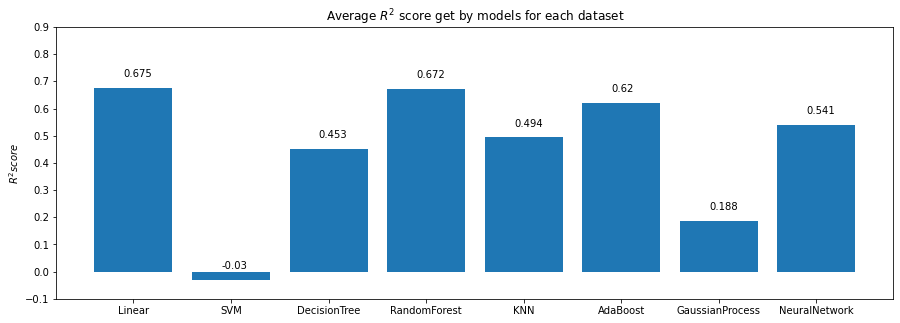

In [169]:
t = np.arange(len(models))
plt.figure(figsize=(15,5))
plt.bar(t,r2_sum.values(),align='center')
plt.xticks(t,list(r2_sum.keys()))
plt.yticks(np.arange(-0.1,1,0.1))
for index,data in enumerate(list(r2_sum.values())):
    plt.text(x=index-0.1 , y =data+0.04 , s=f"{round(data,3)}" , fontdict=dict(fontsize=10))
plt.title('Average $R^2$ score get by models for each dataset')
plt.ylabel('$R^2 score$')
plt.savefig('model_performances.pdf')
plt.show()